In [1]:
"""
气象数据分析及可视化
"""
import numpy as np
import pandas as pd
import datetime

# 加载数据
df_ferrara = pd.read_csv('WeatherData/ferrara_270615.csv')
df_milano = pd.read_csv('WeatherData/milano_270615.csv')
df_mantova = pd.read_csv('WeatherData/mantova_270615.csv')
df_ravenna = pd.read_csv('WeatherData/ravenna_270615.csv')
df_torino = pd.read_csv('WeatherData/torino_270615.csv')
df_asti = pd.read_csv('WeatherData/asti_270615.csv')
df_bologna = pd.read_csv('WeatherData/bologna_270615.csv')
df_piacenza = pd.read_csv('WeatherData/piacenza_270615.csv')
df_cesena = pd.read_csv('WeatherData/cesena_270615.csv')
df_faenza = pd.read_csv('WeatherData/faenza_270615.csv')



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser

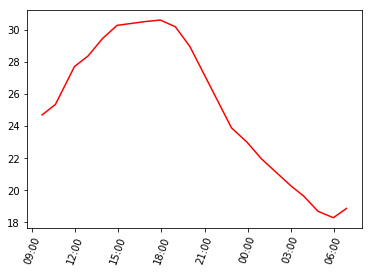

In [3]:
# 温度数据分析 米兰为例
# 取出要分析的温度和日期
y1 = df_milano['temp']
x1 = df_milano['day']

# 把日期转换成 datetime 格式
day_milano = [parser.parse(x) for x in x1]

# fig 是图形对象, ax 是坐标轴对象
fig, ax = plt.subplots()

# 调整x 轴坐标刻度，使其旋转70度
plt.xticks(rotation=70)

# 设定时间格式
hours = mdates.DateFormatter('%H:%M')

# 设定x 轴显示格式
ax.xaxis.set_major_formatter(hours)

# 绘图
ax.plot(day_milano, y1, 'r')

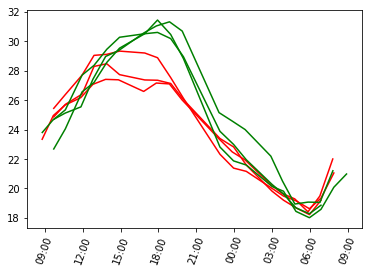

In [5]:
# 分析离海最近和最远的三个城市
# 读取温度和日期数据
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']

# 将日期从 string 转为 datetime 类型
day_ravenna = [parser.parse(x) for x in x1]
day_faenza = [parser.parse(x) for x in x2]
day_cesena = [parser.parse(x) for x in x3]
day_milano = [parser.parse(x) for x in x4]
day_asti = [parser.parse(x) for x in x5]
day_torino = [parser.parse(x) for x in x6]

# 重新定义
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)

# 离海最近的用红色, 远的用绿色
ax.plot(day_ravenna, y1, 'r', day_faenza, y2, 'r', day_cesena, y3, 'r')
ax.plot(day_milano,y4,'g',day_asti,y5,'g',day_torino,y6,'g')

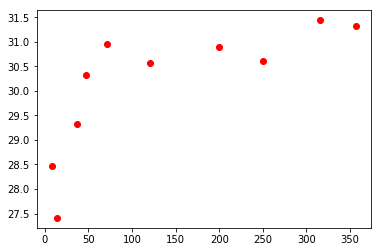

In [4]:
# 收集 10 个城市的最高温和最低温，用线性图表示气温最值点和离海远近之间的关系。
# 城市距离海边距离列表
dist = [df_ravenna['dist'][0],
    df_cesena['dist'][0],
    df_faenza['dist'][0],
    df_ferrara['dist'][0],
    df_bologna['dist'][0],
    df_mantova['dist'][0],
    df_piacenza['dist'][0],
    df_milano['dist'][0],
    df_asti['dist'][0],
    df_torino['dist'][0]
]

# 每个城市最高温度
temp_max = [df_ravenna['temp'].max(),
    df_cesena['temp'].max(),
    df_faenza['temp'].max(),
    df_ferrara['temp'].max(),
    df_bologna['temp'].max(),
    df_mantova['temp'].max(),
    df_piacenza['temp'].max(),
    df_milano['temp'].max(),
    df_asti['temp'].max(),
    df_torino['temp'].max()
]

# 每个城市最低温度
temp_min = [df_ravenna['temp'].min(),
    df_cesena['temp'].min(),
    df_faenza['temp'].min(),
    df_ferrara['temp'].min(),
    df_bologna['temp'].min(),
    df_mantova['temp'].min(),
    df_piacenza['temp'].min(),
    df_milano['temp'].min(),
    df_asti['temp'].min(),
    df_torino['temp'].min()
]

# 绘图
fig, ax = plt.subplots()
ax.plot(dist, temp_max, 'ro')



In [6]:
# 用线性回归算法得到两条直线，分别表示两种不同的气温趋势
from sklearn.svm import SVR

# dist1 靠近海, dist2远离海
dist1 = dist[0:5]
dist2 = dist[5:10]

# 改变元素为列表
dist1 = [[x] for x in dist1]
dist2 = [[x] for x in dist2]

# dist1城市对应最高温度
temp_max1 = temp_max[0:5]
# dist2城市对应最高温度
temp_max2 = temp_max[5:10]

# 调用SVR，参数规定使用线性的拟合函数
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)

# 加入数据, 运行时间较长
svr_lin1.fit(dist1, temp_max1)
svr_lin2.fit(dist2, temp_max2)

# reshape
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)

# 绘图
ax.plot(xp1, yp1, c='b', label='Strong sea effect')
ax.plot(xp2, yp2, c='g', label='Light sea effect')
ax.plot(dist, temp_max, 'ro')
plt.show()

In [7]:
print(svr_lin1.coef_)  #斜率
print(svr_lin1.intercept_)  # 截距
print(svr_lin2.coef_)
print(svr_lin2.intercept_)


[[0.04794118]]
[27.65617647]
[[0.00401274]]
[29.98745223]


[x,y] = [ 53 , 30 ]


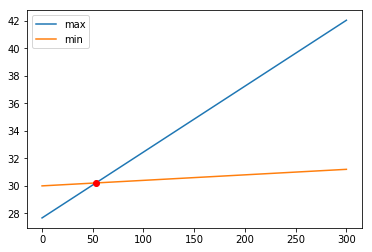

In [31]:
# 交叉点
from scipy.optimize import fsolve

# 定义一条拟合直线
def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1

# 定义第二条拟合曲线
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2

# 定义了找到两条直线的交点的 x 坐标的函数
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print("[x,y] = [ %d , %d ]" % (result,line1(result)))

# x = [0,10,20, ..., 300]
x = np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')
plt.legend(['max', 'min'])


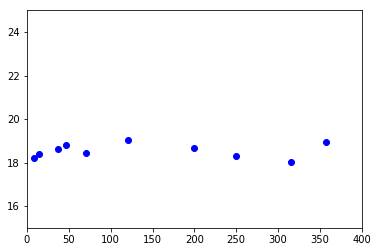

In [9]:
# 分析最低气温
# 规定x 轴和y 轴取值范围
plt.axis((0, 400, 15, 25))
plt.plot(dist, temp_min, 'bo')

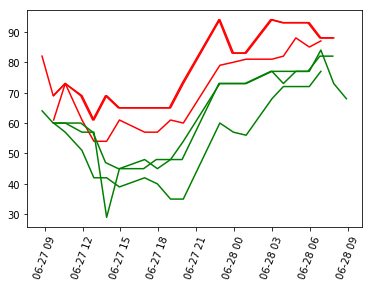

In [13]:
# 湿度数据分析
# 读取湿度数据
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_faenza['humidity']
x2 = df_faenza['day']
y3 = df_cesena['humidity']
x3 = df_cesena['day']
y4 = df_milano['humidity']
x4 = df_milano['day']
y5 = df_asti['humidity']
x5 = df_asti['day']
y6 = df_torino['humidity']
x6 = df_torino['day']

# 定义fig 和 ax
fig, ax = plt.subplots()
plt.xticks(rotation=70)

# 把string类型的时间转换为datetime类型
day_ravenna = [parser.parse(x) for x in x1]
day_faenza = [parser.parse(x) for x in x2]
day_cesena = [parser.parse(x) for x in x3]
day_milano = [parser.parse(x) for x in x4]
day_asti = [parser.parse(x) for x in x5]
day_torino = [parser.parse(x) for x in x6]

# 规定时间表示方式
ax.plot(day_ravenna, y1, 'r', day_faenza, y2, 'r', day_cesena, y3, 'r')
ax.plot(day_milano, y4, 'g', day_asti, y5, 'g', day_torino, y6, 'g')

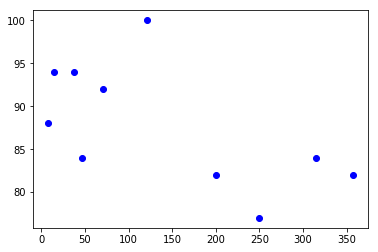

In [14]:
# 获取最大湿度数据
hum_max = [df_ravenna['humidity'].max(),
df_cesena['humidity'].max(),
df_faenza['humidity'].max(),
df_ferrara['humidity'].max(),
df_bologna['humidity'].max(),
df_mantova['humidity'].max(),
df_piacenza['humidity'].max(),
df_milano['humidity'].max(),
df_asti['humidity'].max(),
df_torino['humidity'].max()
]

plt.plot(dist,hum_max,'bo')

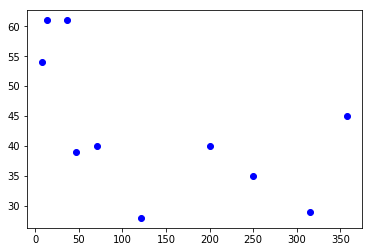

In [15]:
# 获取最小湿度
hum_min = [
df_ravenna['humidity'].min(),
df_cesena['humidity'].min(),
df_faenza['humidity'].min(),
df_ferrara['humidity'].min(),
df_bologna['humidity'].min(),
df_mantova['humidity'].min(),
df_piacenza['humidity'].min(),
df_milano['humidity'].min(),
df_asti['humidity'].min(),
df_torino['humidity'].min()
]
plt.plot(dist,hum_min,'bo')

In [16]:
# 风向频率玫瑰图
df_ravenna[['wind_deg', 'wind_speed', 'day']]

,wind_deg,wind_speed,day
0,159.5000,2.01,2015-06-27 09:42:05
1,100.0000,2.10,2015-06-27 10:37:24
2,80.0000,4.60,2015-06-27 11:57:01
3,90.0000,4.60,2015-06-27 12:53:43
4,80.0000,6.20,2015-06-27 13:54:20
5,80.0000,6.70,2015-06-27 14:55:06
6,90.0000,6.70,2015-06-27 16:55:00
7,90.0000,5.70,2015-06-27 17:55:43
8,90.0000,4.60,2015-06-27 18:58:17
9,97.0000,2.06,2015-06-27 19:58:58


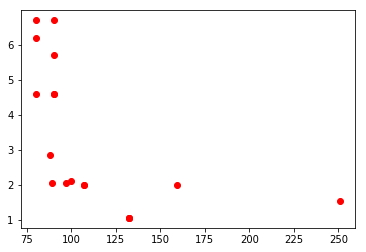

In [17]:
# 把一个DataFrame中的数据点做成散点图
plt.plot(df_ravenna['wind_deg'], df_ravenna['wind_speed'], 'ro')

In [18]:
# 极区图
hist, bins = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
print(bins)

[ 0  5 11  1  0  1  0  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [19]:
"""
三个参数：values 数组，指的是想为其作图的数据，也就是这里的 hist 数组；
第二个参数 city_name 为字符串类型，指定图表标题所用的城市名称；
最后一个参数 max_value 为整型，指定最大的蓝色值。
"""
def showRoseWind(values,city_name,max_value):
    N = 8

    # theta = [pi*1/4, pi*2/4, pi*3/4, ..., pi*2]
    theta = np.arange(2 * np.pi / 16, 2 * np.pi, 2 * np.pi / 8)
    radii = np.array(values)
    # 绘制极区图的坐标系
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

    # 列表中包含的是每一个扇区的 rgb 值，x越大，对应的color越接近蓝色
    colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]

    # 画出每个扇区
    plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)

    # 设置极区图的标题
    plt.title(city_name, x=0.2, fontsize=20)

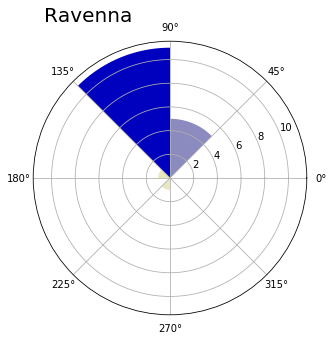

In [20]:
showRoseWind(hist,'Ravenna',max(hist))

[7 2 3 3 3 2 0 0]


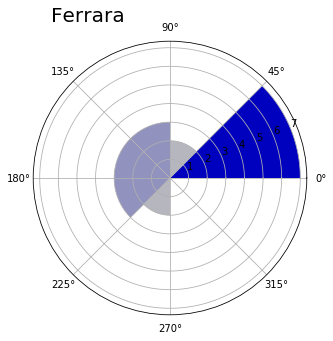

In [22]:
hist, bin = np.histogram(df_ferrara['wind_deg'], 8, [0, 360])
print(hist)
showRoseWind(hist, 'Ferrara', max(hist))

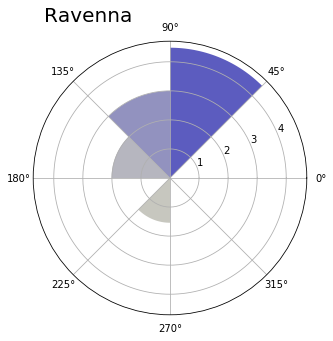

In [28]:
# 计算风速均值的分布情况
def RoseWind_Speed(df_city):
    degs = np.arange(45,361,45)
    tmp = []
    for deg in degs:
    # 获取wind_deg 风速平均值
    # 风向大于deg-46 和 风向小于deg的数据
        tmp.append(df_city[(df_city['wind_deg']>(deg-46)) & (df_city['wind_deg']<deg)]
        ['wind_speed'].mean())
    return np.array(tmp)

showRoseWind(RoseWind_Speed(df_ravenna), 'Ravenna', max(hist))